# Differences between numerical and symbolic computations

## Symbolic computations

They deal with mathematical symbols, expressions and formulas without assigned values. 

### Aim

Essential symbolic computing's aim is to covert the formula to the "best" form. What is best, may differ depending on the goal of computations.
This means that the symbolic computing is all about evaluating the formula. After evaluation we can just plug in the numbers and have the **exact** answer 

Polynomial form:

$$(x+6)^2=x^2+12x+36$$

Shortened formula:

$$\sum_{i=0}^\infty \frac{1}{i!}x^i=e^x$$

## Numerical computations

Plugging in values and computing each operation in the formula, approximating every gotten result.

### Basic difference:

$a=1\\
b=3$

Let's see how those computation methods differ for the same input:

$$\dfrac{a}{b} \cdot b$$

Symbolic:
$\dfrac{a}{b} \cdot b=a=1$

Numerical:
$\dfrac{a}{b} \cdot b=\dfrac{1}{3} \cdot 3=0.3333333333 \cdot 3=0.9999999999$

## Operations

### Differentiation

Definition of derivative:
$$\frac{\partial y}{\partial x}=\lim_{h \to 0}\dfrac{f(x+h)-f(x)}{h}$$

#### Numerical

For numerical computations we would try plugging very small $h$ (the smaller the value, the better approximation), but in case of symbolic computations we would use differentiations formulas to shorten the formula, and then the values would be plugged in.

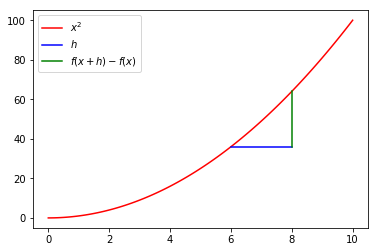

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x=np.r_[0:10:100j]
y=x*x
dx=np.r_[6:8:20j]
dy=np.repeat(36,20)
plt.plot(x,y,'r-',label='$x^2$')
plt.plot(dx,dy,'b-',label='$h$')
plt.axvline(x=8,ymin=37/100,ymax=63/100,color='green',label='$f(x+h)-f(x)$')
plt.legend()
plt.show()

for $f(x)=x^2$:

$$\dfrac{f(x+h)-f(x)}{h}=2x+h$$

#### Symbolic

In case of symbolic computations no approximation is needed. We would only use already given formulas.

$$\frac{\partial y}{\partial x}=\frac{\partial}{\partial x}x^2=2x$$

and now let's plug $x=6$

$$2x=12$$

Python has SymPy library with included symbolic calculations

In [37]:
from sympy import*
x,y,z=symbols('x,y,z')
init_printing(use_unicode=True)
diff(x**2,x)

#### Results

Symbolic formula doesn't expect any approximations because it uses formally proven equations, and by using numerical methods we get approximated result.

### Integration

$$\int_{0}^{5}e^x+x^2 dx$$

#### Symbolic

$$\int_{0}^{5}e^x+x^2 dx=e^x+\frac{x^3}{3}\Biggr|_{0}^{5}=(e^5+5^2)-(e^0+0^2)$$

In [38]:
x = Symbol('x')
integrate(np.e**x+x**2, (x, 0, 5))

#### Nummerical (only definite)

Most iconic numerical way to calculate integral is the "rectangle" method. Integral of function $f(x)$ is equal to area under function's graph. So drawing is possible way to approximate integral.

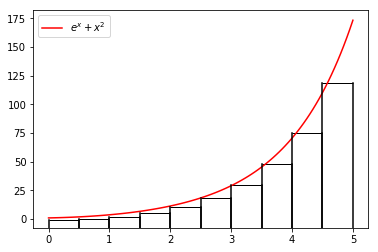

approximated result for 10 rectangles:


In [39]:
#graph
x=np.r_[0:5:100j]
y=np.e**x+x**2
plt.plot(x,y,'r-',label='$e^x+x^2$')
for i in range(10):
    plt.axvline(x=i/2,ymin=0,ymax=(np.e**(i/2)+(i/2)**2+5)/173,color='black')
    plt.axvline(x=(i+1)/2,ymin=0,ymax=(np.e**(i/2)+(i/2)**2+5)/173,color='black')
    plt.axvspan(i/2,(i+1)/2,(np.e**(i/2)+(i/2)**2+5)/173,(np.e**(i/2)+(i/2)**2+5)/173,color='black')
plt.legend()
plt.show()

#approximated area
A=0
for i in range(10):
    A+=0.5*(np.e**(i/2)+(i/2)**2)
print('approximated result for 10 rectangles:')
A

#### Summary

Deviation from actual result is $\dfrac{189.079825769243-149.2432562223387}{189.079825769243}\approx 21\%$

### PDE's

#### Introduction

Partially differential equations contain multivariable functions and their partial derivatives.<br>
PDE's can describe many phenomenas, like electrodynamics, quantum mechanics, heat, gravitation or sound.

#### partial derivative
Let's have function $z=f(x,y)$ <br>
The partial derivative in point $(x_0,y_0)$ would be:<br><br>
With respect to $x$: $\dfrac{\partial z}{\partial x}=\lim_{\Delta x \to 0} \dfrac{f(x_0+\Delta x,y_0)-f(x_0,y_0)}{\Delta x}$<br><br>
With respect to $y$: $\dfrac{\partial z}{\partial y}=\lim_{\Delta y \to 0} \dfrac{f(x_0,y_0+\Delta y)-f(x_0,y_0)}{\Delta y}$

### ODE's

#### Introduction

Ordinary differential equation is special case of Partially differential equation. It is containing functions and derivatives of functions, with **only one** independent variable.<br>
There are ways to calculate ODE symbolically, but in many cases there is no analytical solution and we are left with numerical ones like "Runge-Kutta methods" or "Euler's method".

#### example of analytical solution

$(1+x)\cdot y''(x)=y'(x)$

let's assume $p=y'$:

$$(1+x)\cdot\dfrac{\partial p}{\partial x}=p\\
\dfrac{\partial p}{p}=\dfrac{\partial x}{1+x}\\
\ln p=\ln(1+x)+\ln C\\
p=C(x+1)\\
\dfrac{\partial y}{\partial x}=C+Cx\\
y=\int (C+Cx) \partial x\\
y=\frac{1}{2}Cx^2+Cx+C_1$$

#### Euler's method - numerical solution

This approximation can be used while on ODE if we have the starting conditions - the exact value of the function at some point $(x_0,y_0)$, and the formula is presented in this form
$$\dfrac{\partial y}{\partial x}=f(x,y)$$
<br>
Then: $$y_{i+1}=y_{i}+h \cdot f(x_i,y_i)$$
<br>
where $h$ is step size, and $$\dfrac{\partial y_i}{\partial x_i}\approx \dfrac{y_{i+1}-y_i}{x_{i+1}-x_i}$$

This method is recurrencial, this means tha when you want to get $y(i)$ you have to make $i/h$ steps with step $h=\Delta x$.<br> Let's visualize this on example:


$$\left\{ \begin{array}{ll}
\dfrac{\partial y}{\partial x}=-1.2y+7e^{-0.3x}\\
y(0)=3
\end{array} \right.$$
<br>
The real solution is:
$$y=\dfrac{70}{9}e^{-0.3x}-\dfrac{43}{9}e^{-1.2x}$$
<br>
Let's see how the Euler's method perform for these data:
$$0 \le x \le 3\\
h=0.5$$

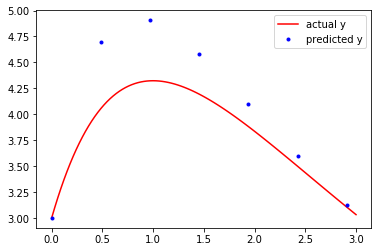

In [97]:
h=1/2
x=np.r_[0:3:100j]
y=((70/9)*np.e**(-0.3*x)-(43/9)*np.e**(-1.2*x))
plt.plot(x,y,'r-',label='actual y')
ypred=np.zeros(7)
ypred[0]=3
for i in range(7)[1::]:
    ypred[i]=ypred[i-1]+h*(-1.2*ypred[i-1]+7*np.e**(-0.3*x[(i-1)*16]))
plt.plot(x[::16],ypred,'b.',label='predicted y')
plt.legend()
plt.show()